__<span style="font-size: 40px;">Telecommunications Analysis</span>__   

---

__<font size="6">1. Business Understanding</font>__   

***<span style="font-size: 24px;">1.1 Overview</span>***

SyriaTel is a telecommunication company that specializes in the provision of data and voice services. Like its competitors, the company’s overarching goal is profit maximization. However, one of the major challenges it faces is customer churn, which occurs when subscribers cancel their services and switch to competitors. This project seeks to address that challenge through data-driven methods.  

---

***<span style="font-size: 24px;">1.2 Problem Statement</span>*** 

SyriaTel is losing a significant amount of revenue because many customers are canceling their services. At present, the company does not have a reliable system to predict which customers are most likely to leave. Without such a system, it is difficult to intervene in time to retain customers, which ultimately leads to reduced profits and loss of market share.  

---

***<span style="font-size: 24px;">1.3 Business Objective</span>*** 

The main business objective is to reduce customer churn by predicting which customers are at risk of leaving. Achieving this will allow SyriaTel to take timely action and improve customer retention.  

---

***<span style="font-size: 24px;">1.4 Project Objectives</span>***   

**Main Objective**  
The main objective of this project is to develop a machine learning classifier that can accurately predict whether a SyriaTel customer is likely to churn.  

**Specific Objectives**  
The specific objectives of the project are:  
1. To analyze customer attributes and usage patterns in order to identify the key drivers of churn.  
2. To develop, train, and evaluate predictive models that classify customers as churners or non-churners.  
3. To generate actionable business insights and recommendations, based on the model outputs, that can support strategies to reduce customer churn.  

---

***<span style="font-size: 24px;">1.5 Research Questions</span>***   

The project is guided by the following research questions:  
1. What characteristics are most strongly associated with customers who churn?  
2. Which machine learning algorithm provides the best predictive performance for churn classification?  
3. How can the insights from the churn model be applied to design effective customer retention strategies?  

---

***<span style="font-size: 24px;">1.6 Success Criteria</span>***    

The success of this project will be assessed in three ways. First, it should generate actionable insights that SyriaTel can use to reduce churn rates in the future. Second, the predictive model should achieve acceptable levels of performance, with high accuracy and a strong ability to correctly identify customers who are likely to leave. Finally, the results should be presented in a way that is clear and interpretable, so that they can be easily understood and applied by business managers and decision-makers.  

---


__<font size="6">2. Data Understanding</font>__  

The dataset used in this project is the Churn in Telecoms dataset obtained from Kaggle. It contains customer account and usage information for a telecommunications company.  

The dataset does not specify the time frame; it is a cross-sectional snapshot of customer behavior.  

It consists of 3,333 rows and 21 columns.  

The target variable is churn. This is a binary variable that indicates whether a customer has churned (True) or not (False). Since the target is categorical, it will be encoded during data preparation to allow machine learning models to process it.  


---

__<font size="6">3. Data Preparation</font>__ 

In this section the Syria Tel dataset is prepared for analysis by cleaning, transforming and standardizing the data. The goal is to ensure accuracy, handle missing values, and make the dataset ready for further exploration and modeling.

---
***<span style="font-size: 24px;">3.1 Importing Relevant Libraries</span>***

We import pandas for data manipulation, Numpy for numerical operations, seaborn and matplotlib for visualizations of patterns and trends.






In [303]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***<span style="font-size: 24px;">3.2 Loading the Data</span>***

Load the already unzipped csv file to a dataframe called Syriatel_data for analysis.

In [304]:
#loading the data
Syriatel_data=pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#the first 5
Syriatel_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [305]:
#familiarizing with our data set
Syriatel_data.shape

(3333, 21)

---

***<span style="font-size: 24px;">3.3 Data Inspection</span>***

In this step, we preview the dataset to understand its structure, identify missing values, detect duplicates, and check data types. This helps ensure the data is ready for cleaning and preparation.

In [306]:
#checking the data types.
Syriatel_data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [307]:
#changing area code data type to object rather than int becaue it is categorical.
Syriatel_data['area code']= Syriatel_data['area code'].astype ('object')

In [308]:
#previewing the dat
Syriatel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [309]:
# Automatically select numerical columns
numerical_cols = Syriatel_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [310]:
Syriatel_data.describe() #for statistical summary statistics.

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


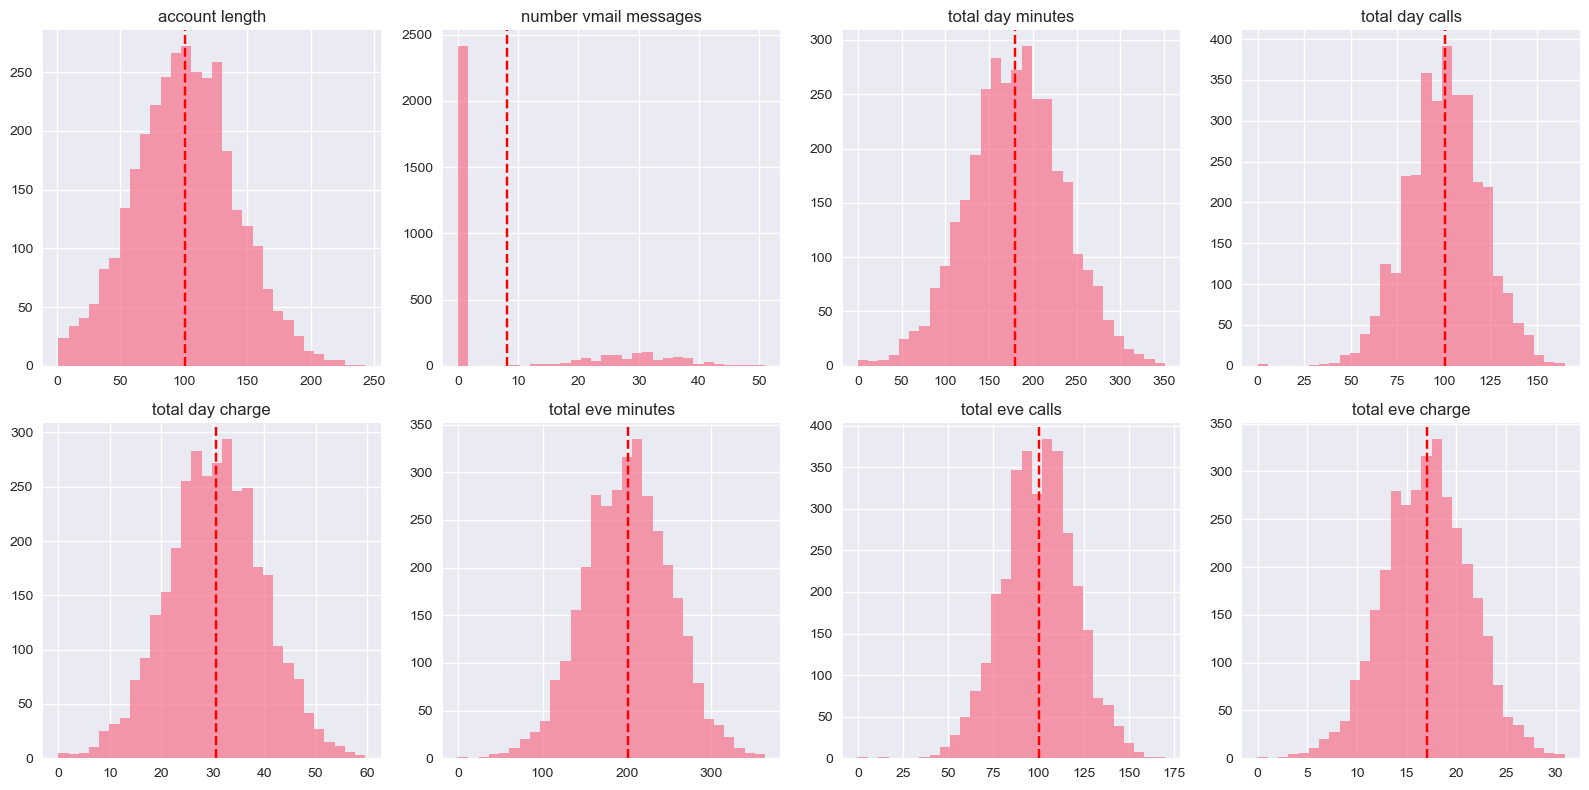

In [311]:
# Create plots to visualize outliers

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Plot histograms
for i, col in enumerate(numerical_cols[:8]):  # First 8 columns
    axes[i].hist(Syriatel_data[col], bins=30, alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].axvline(Syriatel_data[col].mean(), color='red', linestyle='--', label='Mean')

# Hide empty subplots if there are fewer than 8 columns
for i in range(len(numerical_cols[:8]), 8):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [312]:
#checking foor missing values
Syriatel_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [313]:
#checking for duplicates
Syriatel_data.duplicated().sum()

0

---

__<font size="6">4. Data Analysis</font>__ 

***<span style="font-size: 24px;">4.1 Cleaning The Data</span>***

In [314]:
#dropping the phone number column since it is irrelevant.
Syriatel_data=Syriatel_data.drop('phone number',axis=1)
Syriatel_data.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


During the data inspection and cleaning it was found out that the Syria Tel data set contained no missing values, no duplicates.

The area code column was converted to object since it is a categorical variable.

The phone number column was dropped because it acts as an identifier and does not affect whether a customer churns.

In [315]:
#saving the cleaned data set
Syriatel_data.to_csv('Syriatel_cleaned.csv', index=False)

---

***<span style="font-size: 24px;">4.2 Adding Calculated Columns</span>***

*<span style="font-size: 20px;">4.2.1. Total Revenue Column</span>*

The total_revenue column helps quickly see and compare earnings between those who stayed and those who left and use that info easily in analysis and predictions.

In [316]:
# Calculating Total revenue using:
# total_revenue = total_day_charge + total_eve_charge + total_night_charge + total_intl_charge
Syriatel_data['total_revenue'] = (Syriatel_data['total day charge'] + 
                                     Syriatel_data['total eve charge'] + 
                                     Syriatel_data['total night charge'] + 
                                     Syriatel_data['total intl charge'])

*<span style="font-size: 20px;">4.2.2. Total Minutes Column</span>*

The total_minutes column helps you see how much customers use their phones, spot patterns linked to churn and make analysis easier by combining all call times into one number.

In [317]:
# Sum of all time periods
# total_minutes = total_day_minutes + total_eve_minutes + total_night_minutes + total_intl_minutes
Syriatel_data['total_minutes'] = (Syriatel_data['total day minutes'] + 
                                 Syriatel_data['total eve minutes'] + 
                                 Syriatel_data['total night minutes'] + 
                                 Syriatel_data['total intl minutes'])

*<span style="font-size: 20px;">4.2.3. Average Cost Per Minute Column</span>*

In [318]:
# Calculated using:
# avg_cost_per_minute = (total_day_charge + total_eve_charge + total_night_charge + total_intl_charge) / total_minutes
Syriatel_data['avg_cost_per_minute'] = Syriatel_data['total_revenue'] / Syriatel_data['total_minutes']

*<span style="font-size: 20px;">4.2.4. Total calls Column</span>*

In [ ]:
# 
Syriatel_data['total_calls'] = (Syriatel_data['total day calls'] + 
                               Syriatel_data['total eve calls'] + 
                               Syriatel_data['total night calls'] + 
                               Syriatel_data['total intl calls'])

*<span style="font-size: 20px;">4.2.5. Revenue Per Call Column</span>*

In [320]:
# 5. Revenue Per Call
Syriatel_data['revenue_per_call'] = Syriatel_data['total_revenue'] / Syriatel_data['total_calls']

*<span style="font-size: 20px;">4.2.6. Day Usage Ratio Column</span>*

In [321]:
# 6. Day Usage Ratio
Syriatel_data['day_usage_ratio'] = Syriatel_data['total day minutes'] / Syriatel_data['total_minutes']


---

***<span style="font-size: 24px;">4.3 Visuals</span>***

*<span style="font-size: 20px;">4.3.1 Top 10 States by Churn</span>*

This visualization shows where customer loss is highest to focus on improving retention in those areas.

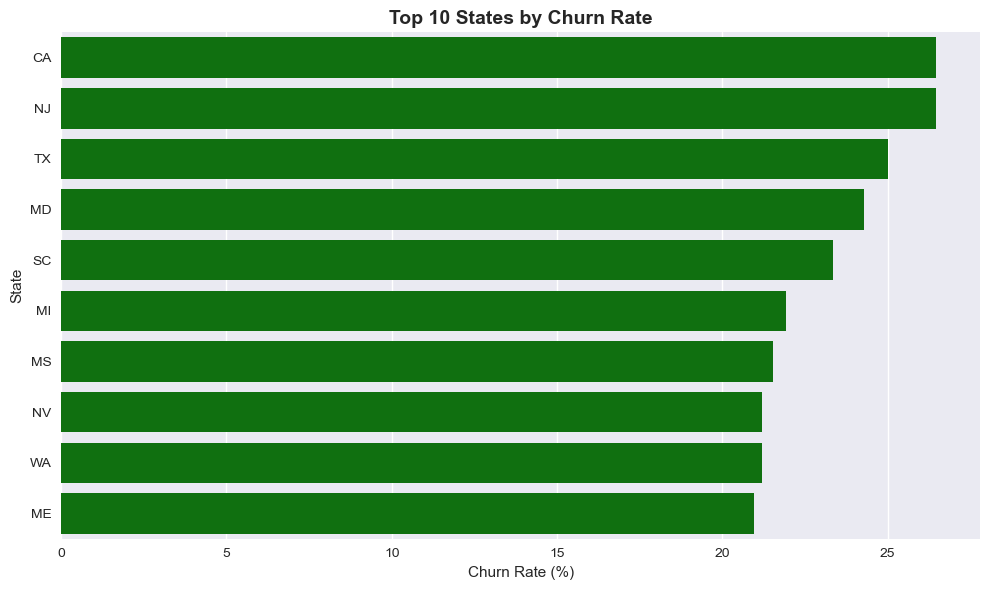

In [322]:
plt.figure(figsize=(10, 6)) 

ax = sns.barplot(data=top_churn_states, x='churn_rate', y='state', color='green')
ax.set_title('Top 10 States by Churn Rate', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Rate (%)')
ax.set_ylabel('State')

plt.tight_layout() 
plt.show()

*<span style="font-size: 20px;">4.3.2 Percentage of Churn</span>*

What is the percentage of those customers who churn in relation to those who do not?

This plot provides a quick overview of customer churn. It helps determine whether churn is a significant issue, laying the groundwork for deeper analysis and revealing potential revenue risks that may require focused retention efforts.

<function matplotlib.pyplot.show(close=None, block=None)>

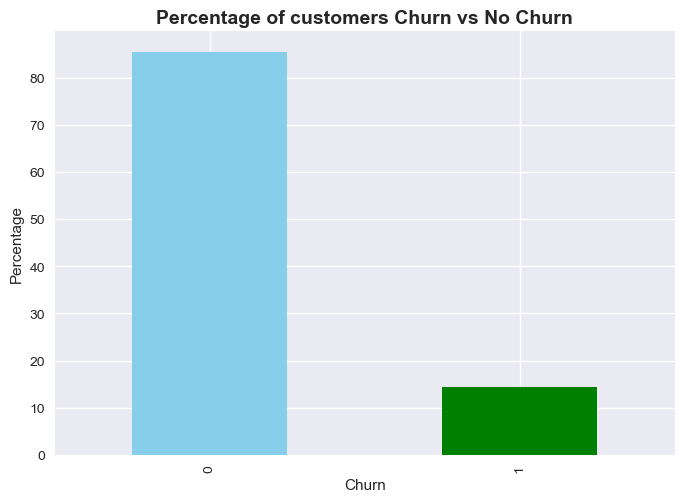

In [323]:
#convert the dtype in the column churn,this converts False=o and True =1
Syriatel_data['churn']= Syriatel_data['churn'].astype('int')
churn_percentages= Syriatel_data['churn'].value_counts(normalize=True)*100 
#plotting
churn_percentages.plot(kind='bar', color=['skyblue','green'])
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of customers Churn vs No Churn', fontsize=14, fontweight='bold')
plt.show

*<span style="font-size: 20px;">4.3.3 Revenue per call vs Total revenue</span>*

This plot reveals how revenue per call relates to total revenue. It uncovers churn patterns across spending levels and supports retention strategies by identifying potential dissatisfaction among low-revenue customers.

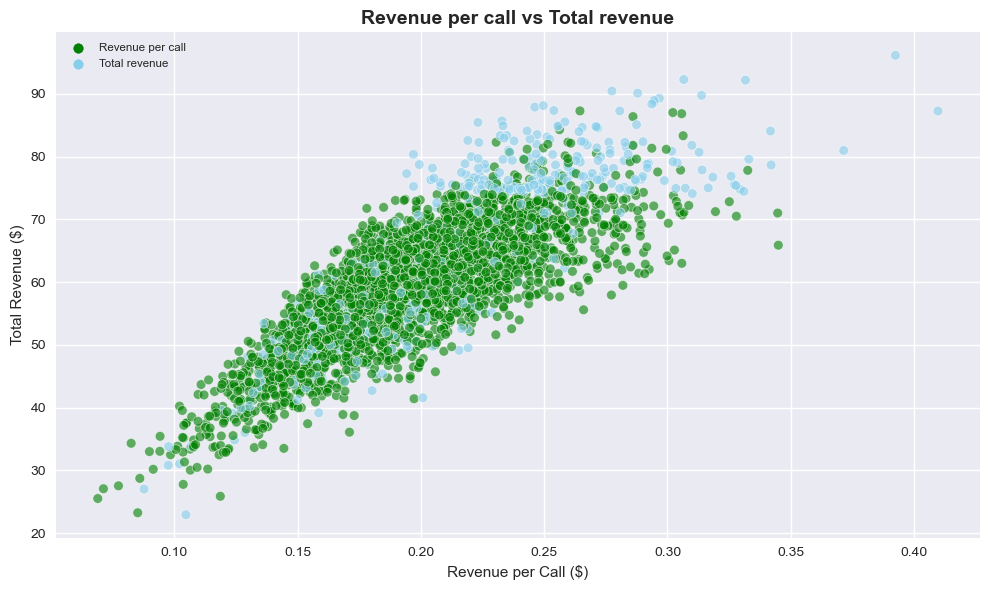

In [324]:
# Plot size
plt.figure(figsize=(10, 6))

# color palete
custom_palette = {0: 'green', 1: 'skyblue'}

# Type of plot
sns.scatterplot(data=Syriatel_data, x='revenue_per_call', y='total_revenue', 
                hue='churn', palette=custom_palette, alpha=0.6)

# Plotting the axes
plt.xlabel('Revenue per Call ($)')
plt.ylabel('Total Revenue ($)')
plt.title('Revenue per call vs Total revenue', fontsize=14, fontweight='bold')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Revenue per call', 'Total revenue'],
           loc='upper left', fontsize='small')

plt.grid(True)
plt.tight_layout()
plt.show()

*<span style="font-size: 20px;">4.3.4 Customer Data Correlation</span>*

This plot helps identify closely related variables for modeling. It uncovers hidden relationships like usage patterns and plan effects on churn and detect unusual correlations that may signal data quality issues.

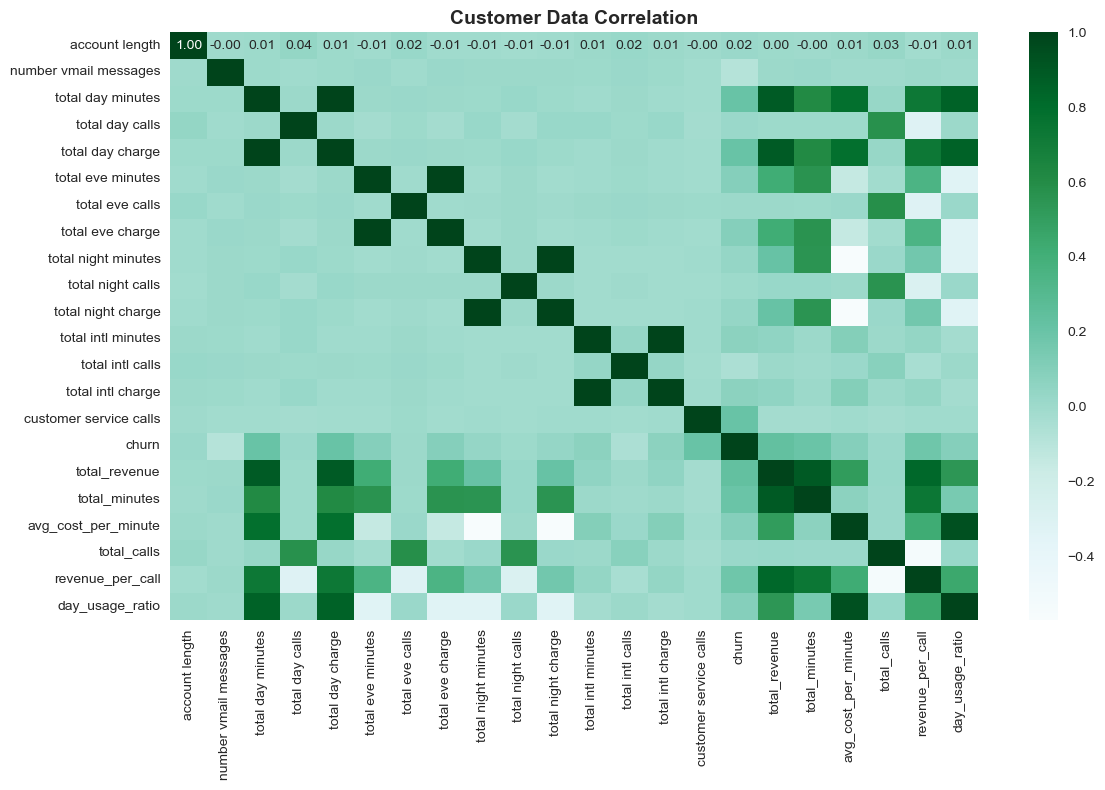

In [325]:
plt.figure(figsize=(12, 8))
corr = Syriatel_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")  
plt.title('Customer Data Correlation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

*<span style="font-size: 20px;">4.3.5 Total Minutes Usage by Churn Status</span>*

This plot helps visualize how much time customers spend on calls and whether usage patterns differ between those who churned and those who stayed. It reveals whether high or low call activity correlates with churn, offering insights into customer engagement and potential dissatisfaction.

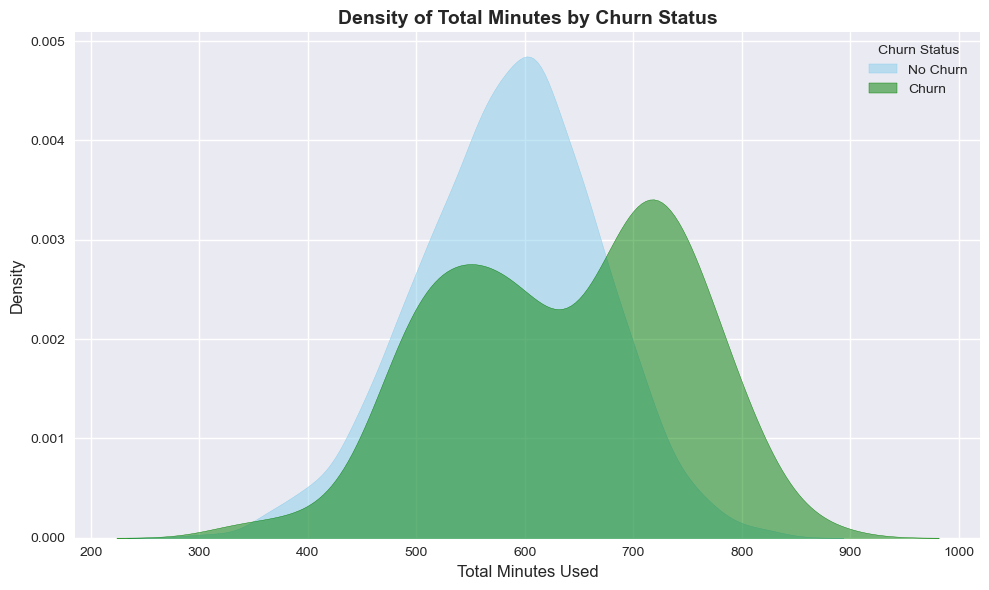

In [326]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=Syriatel_data[Syriatel_data['churn'] == 0]['total_minutes'], label='No Churn',
            color='skyblue', fill=True, alpha=0.5)
sns.kdeplot(data=Syriatel_data[Syriatel_data['churn'] == 1]['total_minutes'], label='Churn',
            color='green', fill=True, alpha=0.5)

plt.title('Density of Total Minutes by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Total Minutes Used', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()
